In [1]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

2025-01-20 15:33:37.397393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737354817.422192   95245 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737354817.429259   95245 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 15:33:37.451554: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = VGG16(weights='imagenet')

I0000 00:00:1737354825.064783   95245 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4280 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


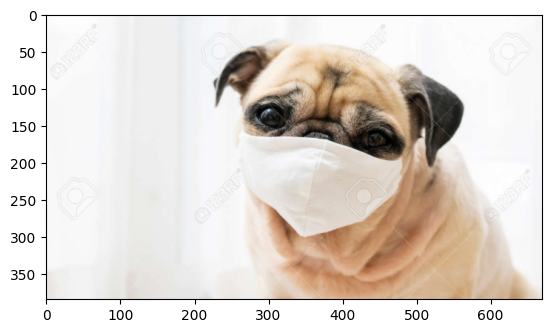

In [5]:
import matplotlib.pyplot as plt

image = cv2.imread("/home/uk/dev_ws/DeepLearning/data/1.20_data/Screenshot from 2025-01-20 15-21-45.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [6]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [8]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
mask (23.07%)


In [9]:
decode_predictions(yhat)

[[('n03724870', 'mask', np.float32(0.23071232)),
  ('n03424325', 'gasmask', np.float32(0.09097505)),
  ('n04209239', 'shower_curtain', np.float32(0.068036065)),
  ('n04229816', 'ski_mask', np.float32(0.056343585)),
  ('n02110958', 'pug', np.float32(0.05549731))]]

In [22]:
import os

path = './train/'
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names] 

In [23]:
import random 
import matplotlib.image as mpimg

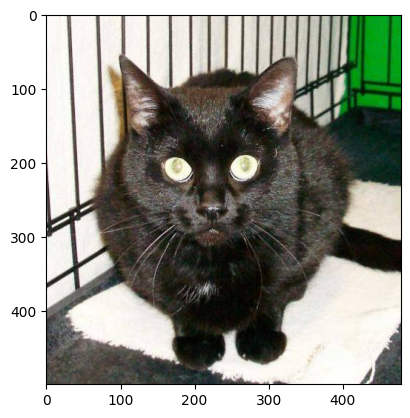

In [25]:
image = mpimg.imread(path + full_names[0])
plt.imshow(image)
plt.show()

In [26]:
image = cv2.resize(image, dsize=(224,224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
tabby (11.99%)


In [38]:
def resize_and_preprocess_vgg(image):
    image = cv2.resize(image, dsize = (224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0],image.shape[1], image.shape[2]))
    return preprocess_input(image)

In [39]:
def predict_vgg(model, image):
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


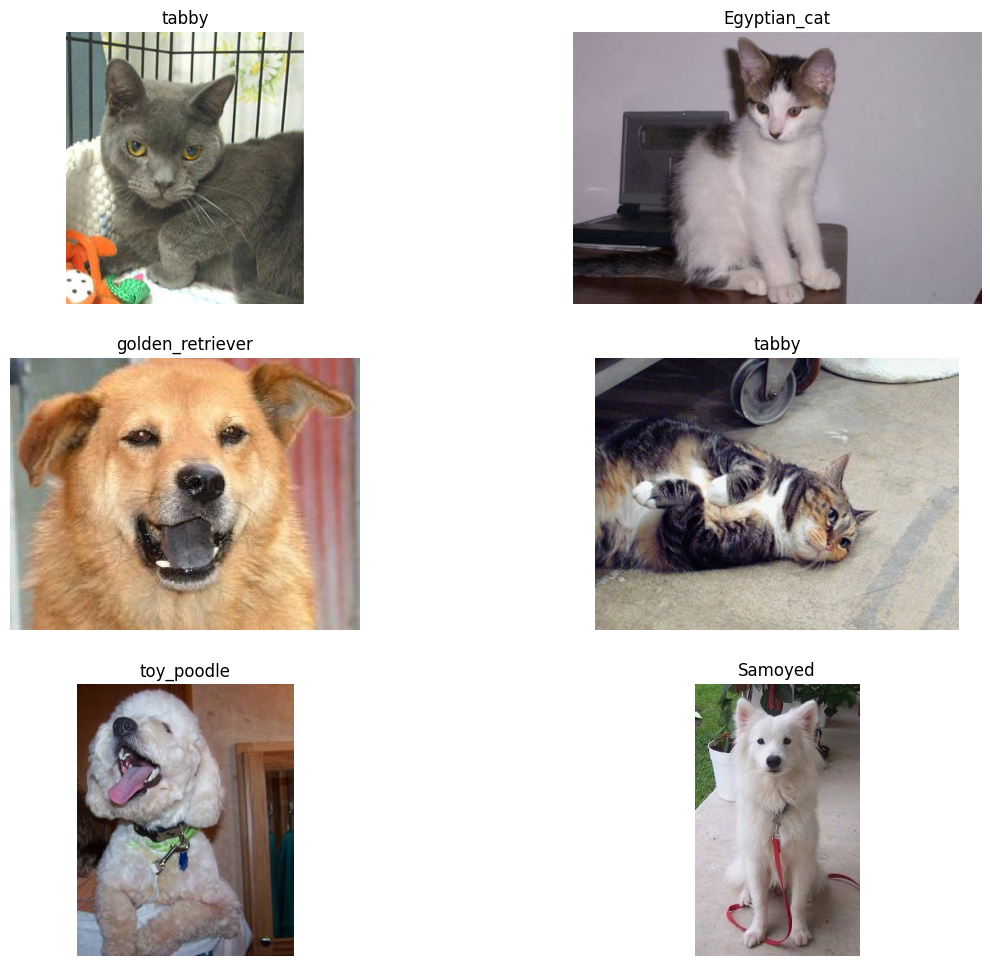

In [40]:
plt.figure(figsize=(14,12))
idx = 1
for each in random.choices(full_names, k=6):
    image = mpimg.imread(path + each)
    plt.subplot(3,2,idx)
    idx += 1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis('off')

plt.show()

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

ModuleNotFoundError: No module named 'konlpy'

In [7]:
kkma.sentences("한국어 분석을 시작합니다 재밌어요~")

['한국어 분석을 시작합니다', '재밌어요~']